# Kalman Tracking Demos

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import simulator
from environment import RectangularEnvironment
from targets import PointTarget
from vis import TrackingVis
from sensors import OmniSensor, DirectionalSensor
from pubsub import Broker, Subscriber, Publisher
from tracker import KalmanTracker, RealTimeKalmanTracker
from scheduler import SimpleScheduler
from performance import TrackingStats
import time
from IPython.display import display

%matplotlib notebook

# Simulate one object

<IPython.core.display.Javascript object>


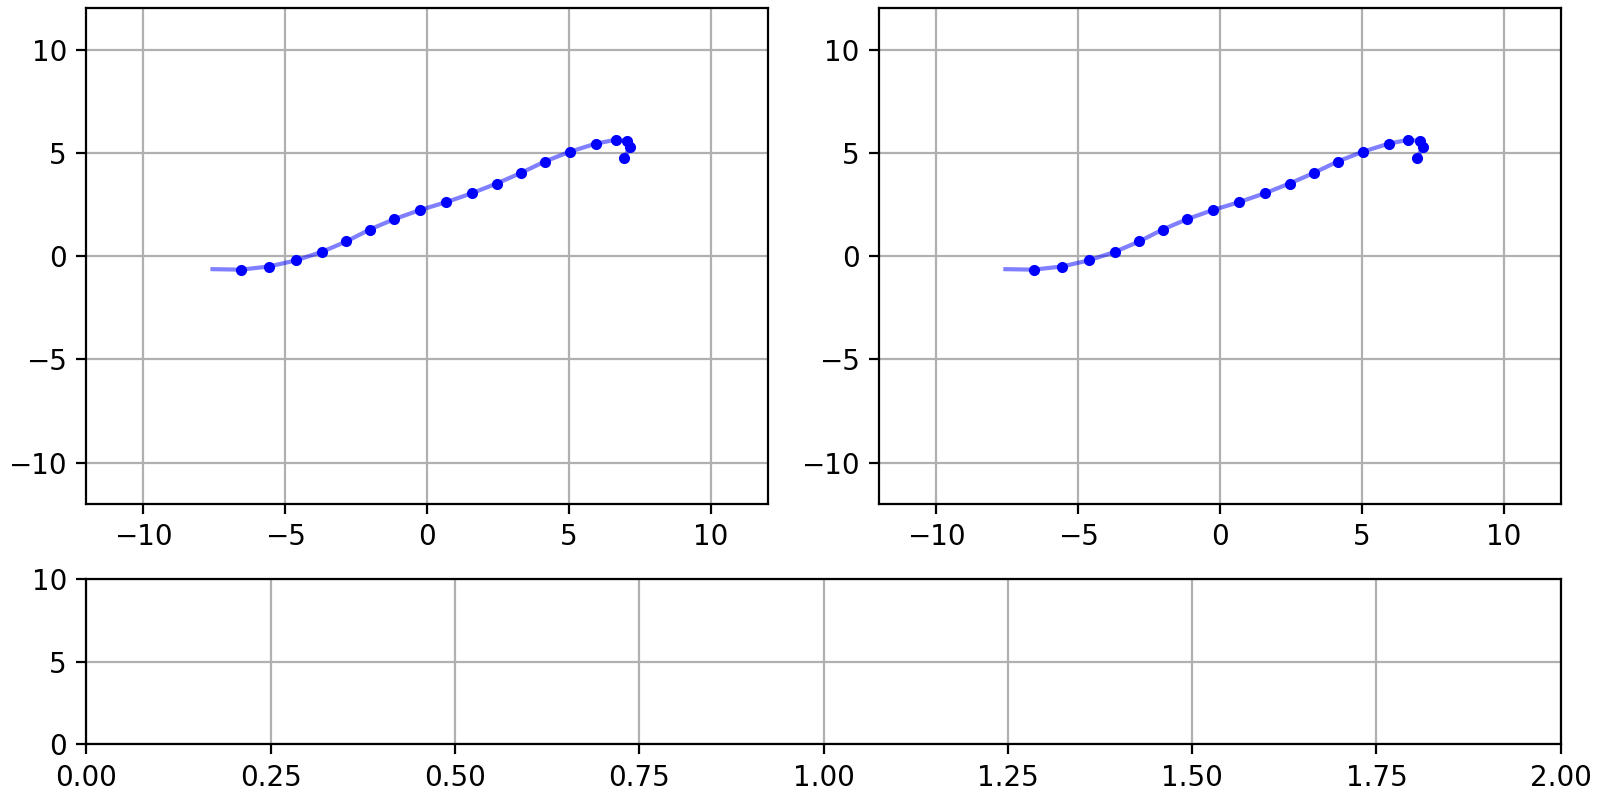

In [2]:
#Get a message passing broker
broker=Broker()

#Define the environment
env     = RectangularEnvironment(-10,10,-10,10)

#Define views
tv = TrackingVis([8,4],env,broker) 

#Create a target to track
target1 = PointTarget(id="Target1",broker=broker,dt=0.1)

#Create the simulator and add objects
sim     = simulator.Simulator("Simple Tracking",env,[tv])

sim.add_object(target1)


In [3]:
sim.run(20)

Starting Target1
Stopping Target1


# Simulate two objects

In [ ]:
#Get a message passing broker
broker=Broker()

#Define the environment
env     = RectangularEnvironment(-10,10,-10,10)

#Define views
tv = TrackingVis([8,4],env,broker) 

#Create a target to track
target1 = PointTarget(id="Target1",broker=broker,dt=0.1,color='b')
target2 = PointTarget(id="Target2",broker=broker,dt=0.1,color='r')

#Create the simulator and add objects
sim     = simulator.Simulator("Simple Tracking",env,[tv])

sim.add_object(target1)
sim.add_object(target2)

In [ ]:
sim.run(20)

# Track one object with one sensor

<IPython.core.display.Javascript object>


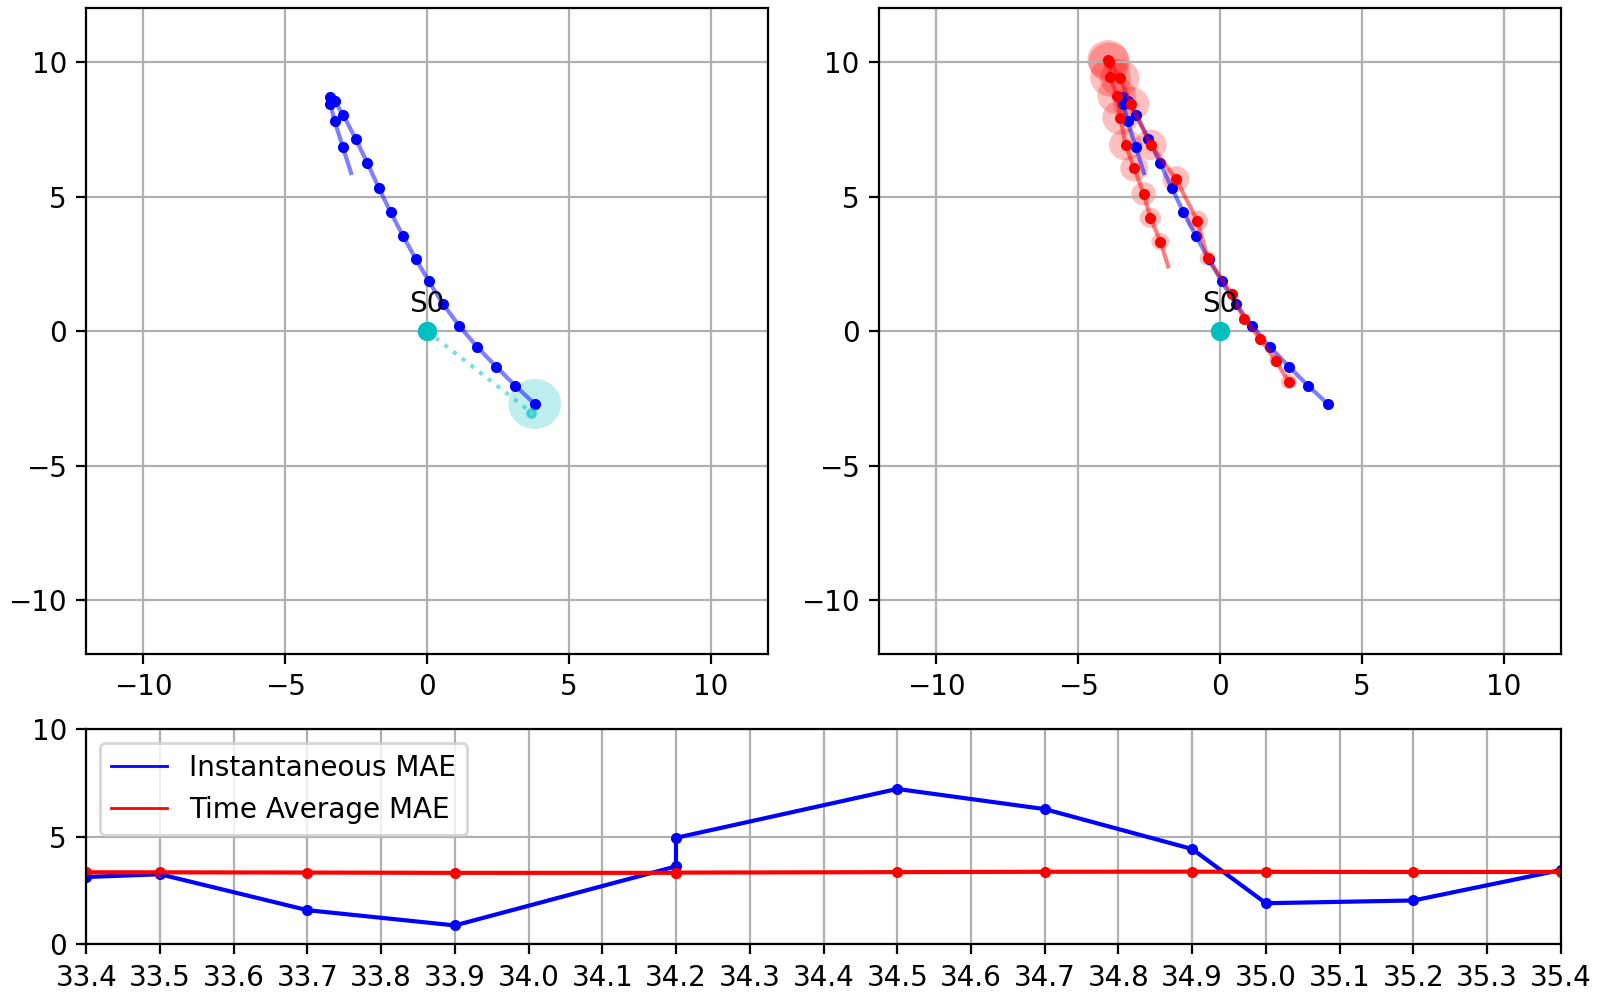

In [38]:
#Get a message passing broker
broker=Broker()

#Define the environment
env     = RectangularEnvironment(-10,10,-10,10)

#Define views
tv = TrackingVis([8,5],env,broker) 

#Create a target to track
target1 = PointTarget(id="Target1",broker=broker,dt=0.1)

#Create sensors
sensor_latency = 0
sensor0 = OmniSensor(np.array([0,0]),id="S0",color="c",broker=broker,dt=0.1,latency=sensor_latency)

#Create a single object tracker
tracker1 = RealTimeKalmanTracker(id="KT1",color="r",broker=broker,dt=0.1)

#Create a resource scheduler
sched1 = SimpleScheduler(id="Sched1",max_sensors=1,broker=broker,sensors=[sensor0],dt=0.1)

#Create a performance monitor
perf1 = TrackingStats(id="Perf1",broker=broker)

#Create the simulator and add objects
sim     = simulator.Simulator("Simple Tracking",env,[tv])

sim.add_object(target1)
sim.add_object(sensor0)
sim.add_object(tracker1)
sim.add_object(sched1)
sim.add_object(perf1)

In [40]:
sim.run(20)

Starting Target1
Starting S0
Starting KT1
Starting Sched1
Starting Perf1


Exception in thread Thread-26:
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/689/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Applications/anaconda3/envs/689/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/marlin/Desktop/Research/IoBT/resource_constrained_tracking/simulator.py", line 31, in run
    self.step()
  File "/Users/marlin/Desktop/Research/IoBT/resource_constrained_tracking/performance.py", line 23, in step
    self.last_target = np.array(msg["pos"][:2,0]).flatten()
TypeError: 'NoneType' object is not subscriptable


Stopping Target1
Stopping S0
Stopping KT1
Stopping Sched1
Stopping Perf1
Final imae performance: 3.516
Final cmae performance: 3.358


# Track one object with two sensors

<IPython.core.display.Javascript object>


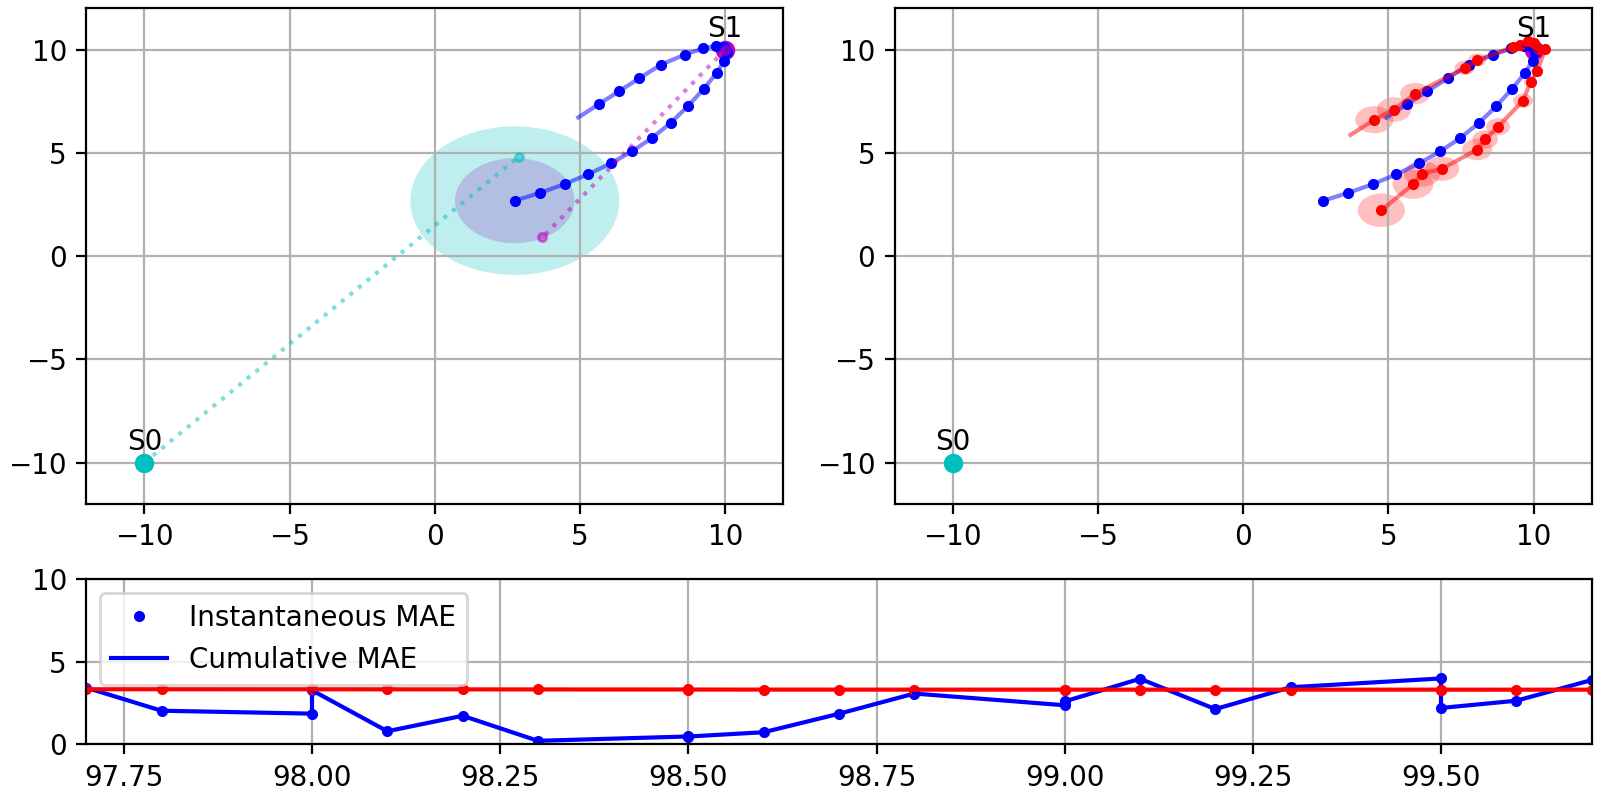

In [28]:
#Get a message passing broker
broker=Broker()

#Define the environment
env     = RectangularEnvironment(-10,10,-10,10)

#Define views
tv = TrackingVis([8,4],env,broker) 

#Create a target to track
target1 = PointTarget(id="Target1",broker=broker,dt=0.1)

#Create sensors
sensor_latency = 0
sensor0 = OmniSensor(np.array([-10,-10]),id="S0",color="c",broker=broker,dt=0.1,latency=sensor_latency)
sensor1 = OmniSensor(np.array([10,10]),id="S1",color="m",broker=broker,dt=0.1,latency=sensor_latency)

#Create a single object tracker
tracker1 = RealTimeKalmanTracker(id="KT1",color="r",broker=broker,dt=0.1)

#Create a resource scheduler
sched1 = SimpleScheduler(id="Sched1",max_sensors=2,broker=broker,sensors=[sensor0,sensor1],dt=0.1)

#Create a performance monitor
perf1 = TrackingStats(id="Perf1",broker=broker)

#Create the simulator and add objects
sim     = simulator.Simulator("Simple Tracking",env,[tv])

sim.add_object(target1)
sim.add_object(sensor0)
sim.add_object(sensor1)
sim.add_object(tracker1)
sim.add_object(sched1)
sim.add_object(perf1)

In [29]:
sim.run(100)

Starting Target1
Starting S0
Starting S1
Starting KT1
Starting Sched1
Starting Perf1
Stopping Target1
Stopping S0
Stopping S1
Stopping KT1
Stopping Sched1
Stopping Perf1
	Final imae performance: 3.029
	Final cmae performance: 3.302


# Track one object using best 2 of 4 sensors 

<IPython.core.display.Javascript object>


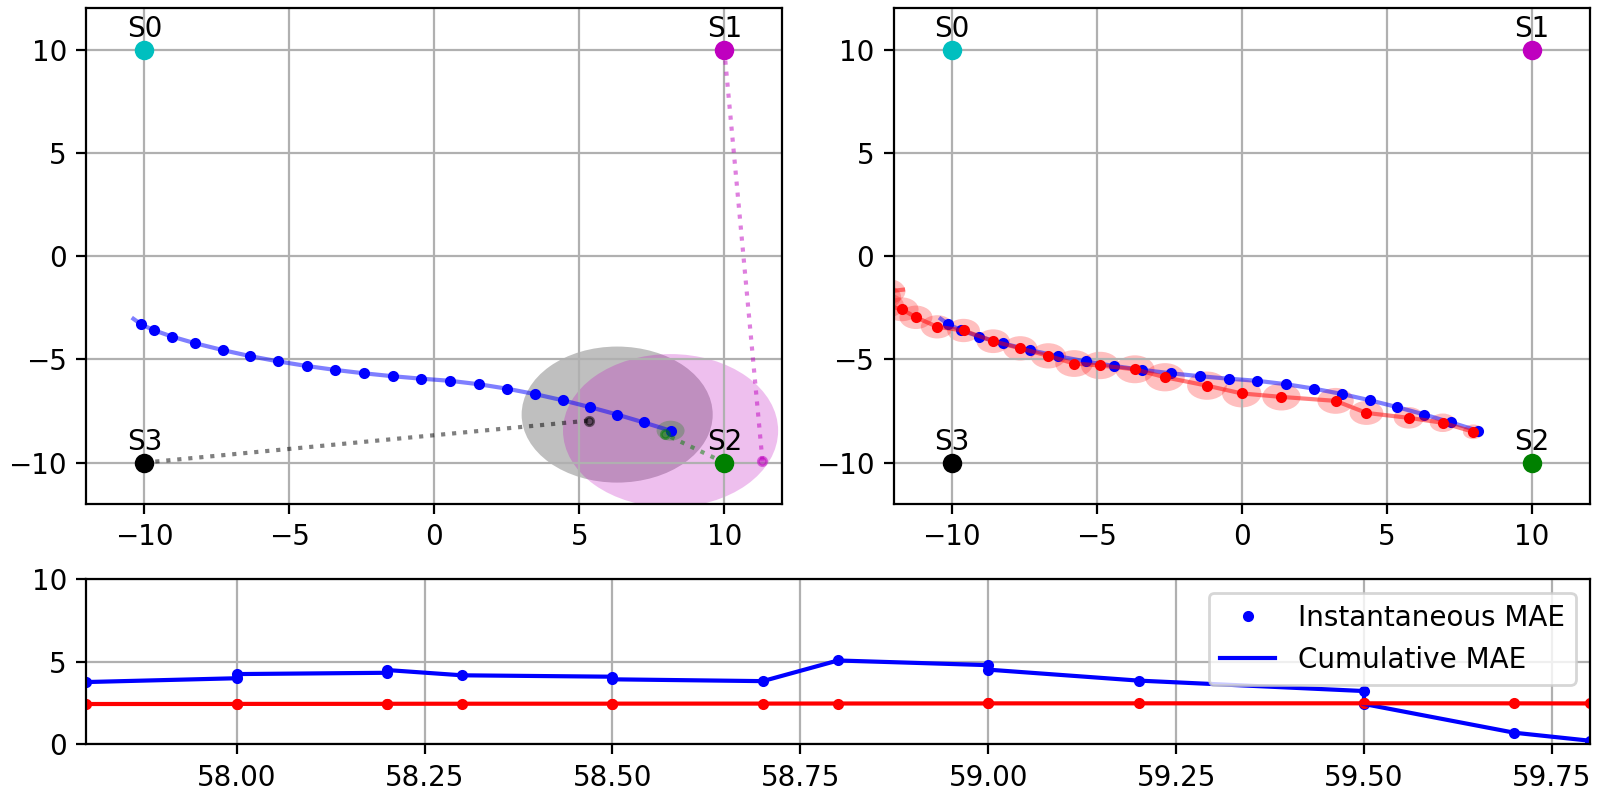

In [30]:
#Get a message passing broker
broker=Broker()

#Define the environment
env     = RectangularEnvironment(-10,10,-10,10)

#Define views
tv = TrackingVis([8,4],env,broker) 

#Create a target to track
target1 = PointTarget(id="Target1",broker=broker,dt=0.1)

#Create sensors
sensor_latency = 0
sensor0 = OmniSensor(np.array([-10,10]),id="S0",color="c",broker=broker,dt=0.1,latency=sensor_latency)
sensor1 = OmniSensor(np.array([10,10]),id="S1",color="m",broker=broker,dt=0.1,latency=sensor_latency)
sensor2 = OmniSensor(np.array([10,-10]),id="S2",color="g",broker=broker,dt=0.1,latency=sensor_latency)
sensor3 = OmniSensor(np.array([-10,-10]),id="S3",color="k",broker=broker,dt=0.1,latency=sensor_latency)

#Create a single object tracker
tracker1 = RealTimeKalmanTracker(id="KT1",color="r",broker=broker,dt=0.1)

#Create a resource scheduler
sched1 = SimpleScheduler(id="Sched1",max_sensors=2,broker=broker,sensors=[sensor0,sensor1,sensor2,sensor3],dt=0.1)

#Create a performance monitor
perf1 = TrackingStats(id="Perf1",broker=broker)

#Create the simulator and add objects
sim     = simulator.Simulator("Simple Tracking",env,[tv])

sim.add_object(target1)
sim.add_object(sensor0)
sim.add_object(sensor1)
sim.add_object(sensor2)
sim.add_object(sensor3)
sim.add_object(tracker1)
sim.add_object(sched1)
sim.add_object(perf1)

In [31]:
sim.run(100)

Starting Target1
Starting S0
Starting S1
Starting S2
Starting S3
Starting KT1
Starting Sched1
Starting Perf1
Stopping Target1
Stopping S0
Stopping S1
Stopping S2
Stopping S3
Stopping KT1
Stopping Sched1
Stopping Perf1
	Final imae performance: 0.854
	Final cmae performance: 2.465


# Track one object with best two of four directional sensors

<IPython.core.display.Javascript object>


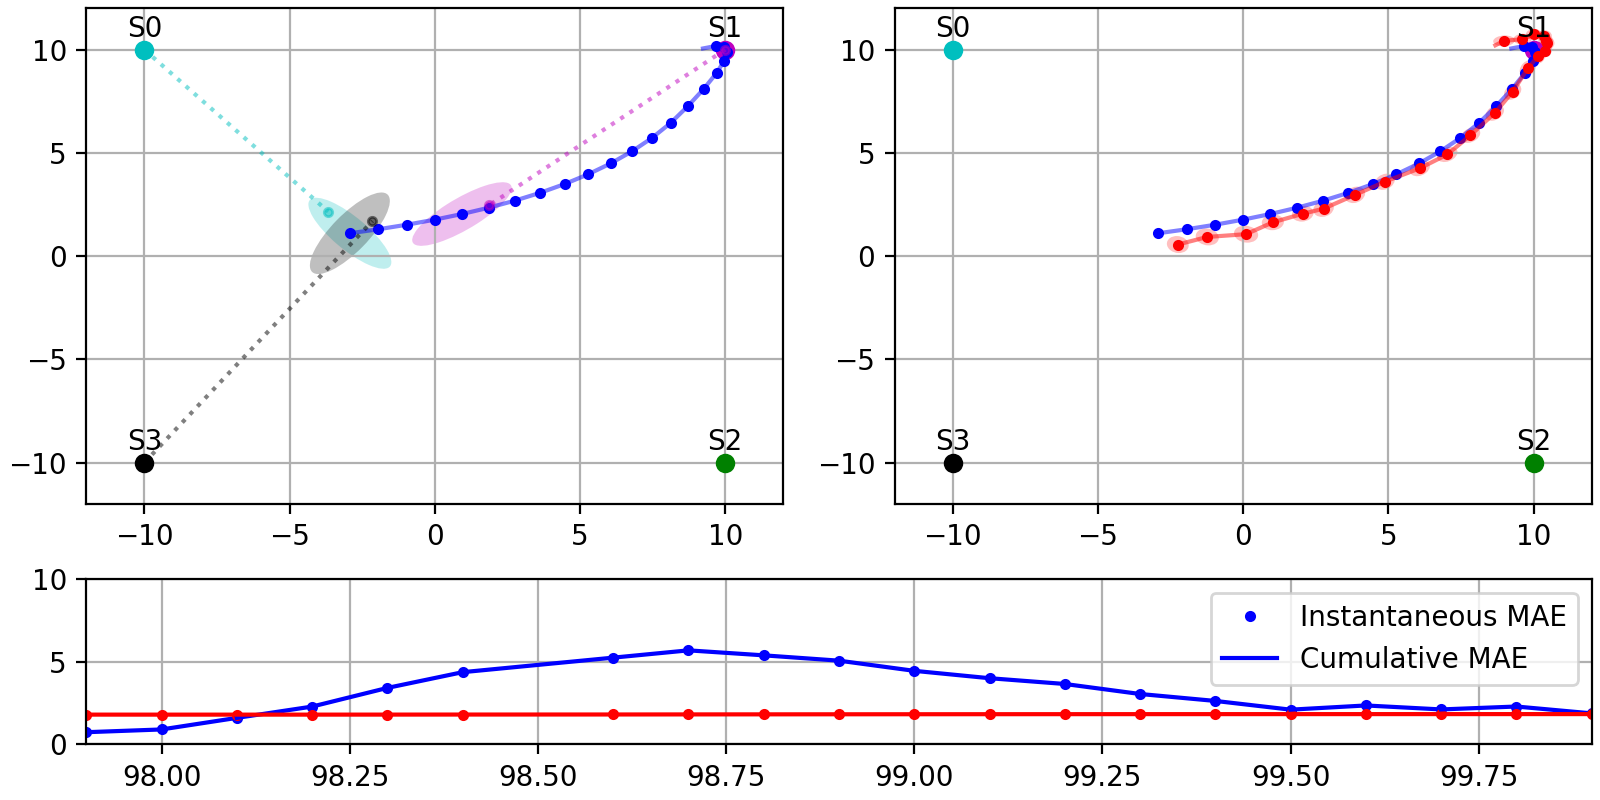

In [34]:
#Get a message passing broker
broker=Broker()

#Define the environment
env     = RectangularEnvironment(-10,10,-10,10)

#Define views
tv = TrackingVis([8,4],env,broker) 

#Create a target to track
target1 = PointTarget(id="Target1",broker=broker,dt=0.1)

#Create sensors
sensor_latency = 0
sensor0 = DirectionalSensor(np.array([-10,10]),id="S0",color="c",broker=broker,dt=0.1,latency=sensor_latency)
sensor1 = DirectionalSensor(np.array([10,10]),id="S1",color="m",broker=broker,dt=0.1,latency=sensor_latency)
sensor2 = DirectionalSensor(np.array([10,-10]),id="S2",color="g",broker=broker,dt=0.1,latency=sensor_latency)
sensor3 = DirectionalSensor(np.array([-10,-10]),id="S3",color="k",broker=broker,dt=0.1,latency=sensor_latency)

#Create a single object tracker
tracker1 = RealTimeKalmanTracker(id="KT1",color="r",broker=broker,dt=0.1)

#Create a resource scheduler
sched1 = SimpleScheduler(id="Sched1",max_sensors=2,broker=broker,sensors=[sensor0,sensor1,sensor2,sensor3],dt=0.1)

#Create a performance monitor
perf1 = TrackingStats(id="Perf1",broker=broker)

#Create the simulator and add objects
sim     = simulator.Simulator("Simple Tracking",env,[tv])

sim.add_object(target1)
sim.add_object(sensor0)
sim.add_object(sensor1)
sim.add_object(sensor2)
sim.add_object(sensor3)
sim.add_object(tracker1)
sim.add_object(sched1)
sim.add_object(perf1)

In [35]:
#Run the simulator
sim.run(100)

Starting Target1
Starting S0
Starting S1
Starting S2
Starting S3
Starting KT1
Starting Sched1
Starting Perf1
Stopping Target1
Stopping S0
Stopping S1
Stopping S2
Stopping S3
Stopping KT1
Stopping Sched1
Stopping Perf1
	Final imae performance: 2.340
	Final cmae performance: 1.824


# Track one object using best one of four sensors with different latencies

<IPython.core.display.Javascript object>


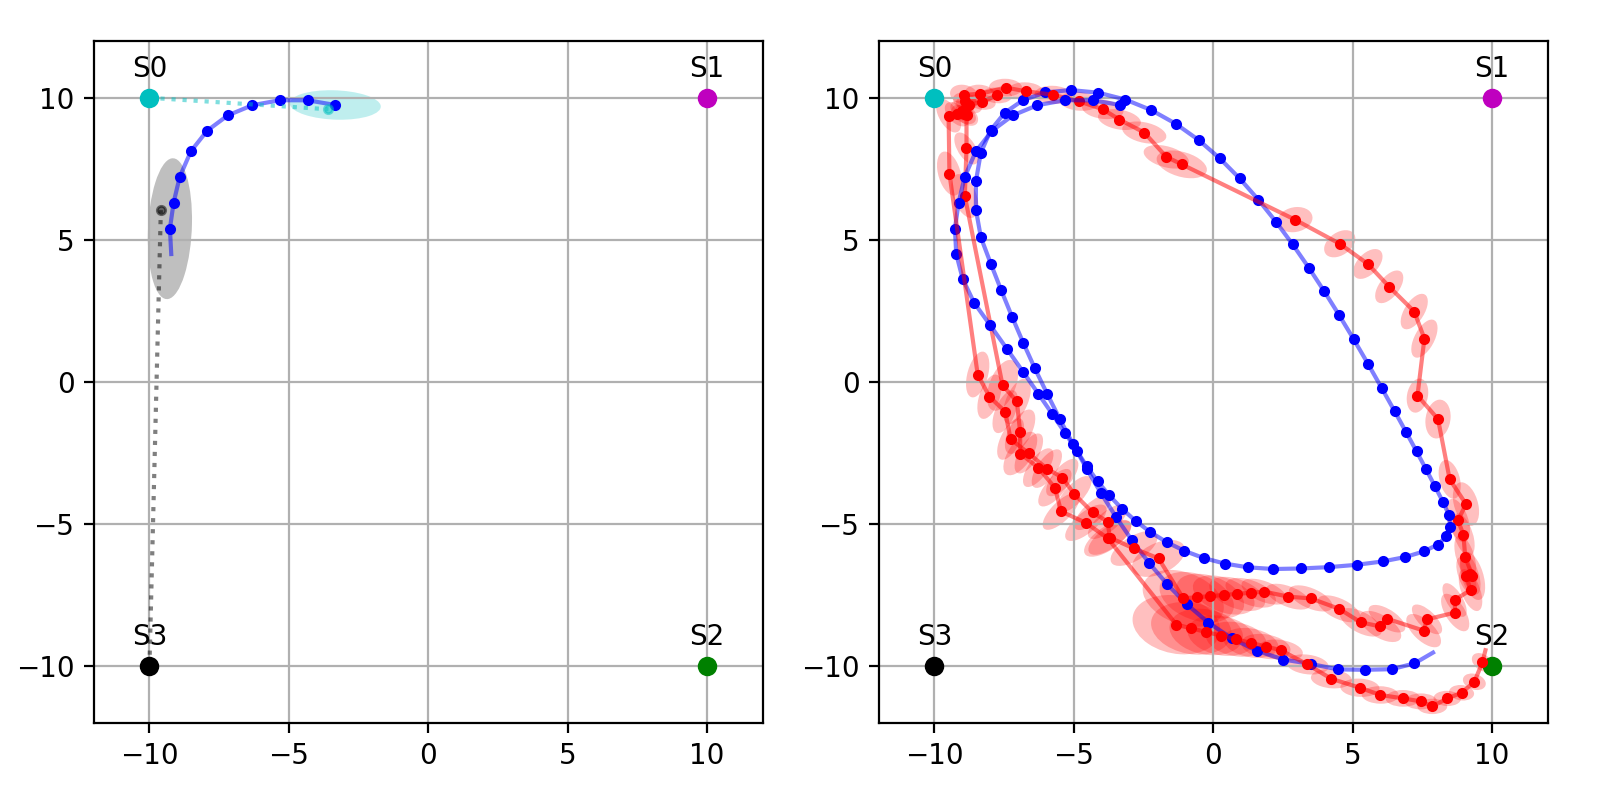

In [10]:
#Get a message passing broker
broker=Broker()

#Define the environment
env     = RectangularEnvironment(-10,10,-10,10)

#Define views
tv = TrackingVis([8,4],env,broker) 

#Create a target to track
target1 = PointTarget(id="Target1",broker=broker,dt=0.1)

#Create sensors
sensor_latency = 0
sensor0 = DirectionalSensor(np.array([-10,10]),id="S0",color="c",broker=broker,dt=0.1,latency=sensor_latency)
sensor1 = DirectionalSensor(np.array([10,10]),id="S1",color="m",broker=broker,dt=0.1,latency=sensor_latency)
sensor2 = DirectionalSensor(np.array([10,-10]),id="S2",color="g",broker=broker,dt=0.1,latency=sensor_latency)
sensor3 = DirectionalSensor(np.array([-10,-10]),id="S3",color="k",broker=broker,dt=0.1,latency=0.5)

#Create a single object tracker
tracker1 = RealTimeKalmanTracker(id="KT1",color="r",broker=broker,dt=0.1)

#Create a resource scheduler
sched1 = SimpleScheduler(id="Sched1",max_sensors=1,broker=broker,sensors=[sensor0,sensor1,sensor2,sensor3],dt=0.1)

#Create the simulator and add objects
sim     = simulator.Simulator("Simple Tracking",env,[tv])

sim.add_object(target1)
sim.add_object(sensor0)
sim.add_object(sensor1)
sim.add_object(sensor2)
sim.add_object(sensor3)
sim.add_object(tracker1)
sim.add_object(sched1)

In [11]:
sim.run(100)

Starting Target1
Starting S0
Starting S1
Starting S2
Starting S3
Starting KT1
Starting Sched1
Stopping Target1
Stopping S0
Stopping S1
Stopping S2
Stopping S3
Stopping KT1
Stopping Sched1
